In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from luciferase.io import DualLuciferaseExperimentReader

experiment = DualLuciferaseExperimentReader.read(
    '/Users/rejsmont/Desktop/24122020/metadata.xlsx', [
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t1_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t2_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t3_ag160ag161pmt.xlsx'
    ], [
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t1_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t2_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t3_ag160ag161pmt.xlsx'
    ]
)

In [3]:
import pandas as pd

idx = pd.IndexSlice
n = experiment.normalize(background='neg').sort_index()
d = n.drop(n.loc[idx[3, 'F', 4:6], :].index) \
     .reset_index() \
     .set_index(['induction', 'sample', 'plate']) \
     .loc[:, ['normalized']] \
     .dropna() \
     .sort_index()

d

normalized
induction sample     plate            
0.0       MT mutated 1        0.011660
                     1        0.009859
                     1        0.006857
                     2        0.027311
                     2        0.019554
...                                ...
1000.0    MT native  2        0.426006
                     2        0.738645
                     3        1.108558
                     3        1.568674
                     3        1.032706

[105 rows x 1 columns]

In [6]:
data.index.levels

NameError: name 'data' is not defined

TypeError: '>=' not supported between instances of 'FrozenList' and 'int'

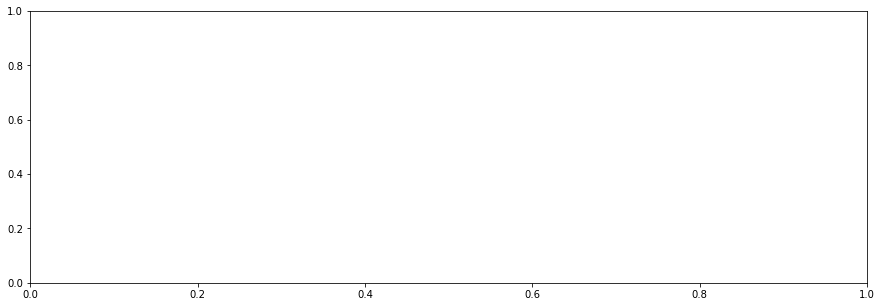

In [5]:
from matplotlib import pyplot as plt
from luciferase import graphs

fig, ax = plt.subplots(figsize=(15, 5))
graphs.catplot(d, ax=ax, samples=['MT native', 'MT mutated'], spacing=0.5,
               title='Luciferase assay for the MT promoter',
               ylabel='Normalized signal (ff/rn) [au]',
               xlabel='CuSO$_4$ concentration [μm]')
fig.show()
